In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(16.7,6.27)})

In [2]:
train = pd.read_csv("../data/train/train.csv")
print(train.shape)
train.head()

(237609, 7)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [3]:
logs = pd.read_csv("../data/train/view_log.csv")
print(logs.shape)
logs.head()

(3118622, 5)


,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [4]:
items = pd.read_csv("../data/train/item_data.csv")
print(items.shape)
items.head()

(132761, 6)


,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [5]:
test = pd.read_csv("../data/test/test.csv")
test.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [6]:
def unique(df):
    print("Number of rows in df: ",df.shape[0])
    for col in df.columns:
        print("Number of unique values in "+col+": ",len(df[col].unique()))
def missing(df):
    for col in df.columns:
        print("Number of missing values in "+col+": ",df[col].isnull().sum())
def values(df,cols):
    for col in cols:
        print("Value Counts for the column :",col)
        print(df[col].value_counts())

## 1. EDA
### 1.1 Exploring train.csv
#### 1.1.1 Unique values and variable types

In [7]:
unique(train)

Number of rows in df:  237609
Number of unique values in impression_id:  237609
Number of unique values in impression_time:  36461
Number of unique values in user_id:  74723
Number of unique values in app_code:  490
Number of unique values in os_version:  3
Number of unique values in is_4G:  2
Number of unique values in is_click:  2


#### 1.1.2 Missing values check

In [8]:
missing(train)

Number of missing values in impression_id:  0
Number of missing values in impression_time:  0
Number of missing values in user_id:  0
Number of missing values in app_code:  0
Number of missing values in os_version:  0
Number of missing values in is_4G:  0
Number of missing values in is_click:  0


1. Impression ID: Unique indentifier for each row
3. impression time: date_time variable
2. user_id: Identifier for each user
3. app_code: identifier for different websites/ applications. Should not be treated as a numerical value as it has no inherant numerical ranking (nominal variable)
4. os_version: Has inherant numerical ranking (ordinal variable)
5. is_4G : Binary variable (perform get_dummies)
6. is_click: Target Variable (binary) to denote whether or not the user clicked on the ad/

#### 1.1.3 Distribution of features and corresponding encoding scheme to be used

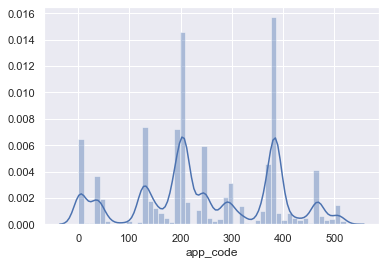

In [9]:
sns.distplot(train.app_code)

In [10]:
# sns.distplot(train.os_version)
print(train.os_version.value_counts())

latest          129216
intermediate     55543
old              52850
Name: os_version, dtype: int64


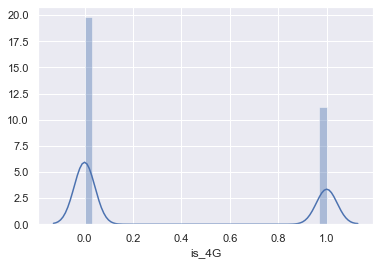

In [11]:
sns.distplot(train.is_4G)

0    226747
1     10862
Name: is_click, dtype: int64


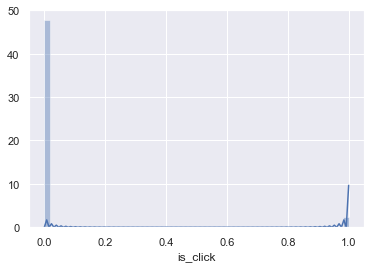

In [12]:
sns.distplot(train.is_click)
print(train.is_click.value_counts())

In [13]:
print("Ratio between cases where customer actually clicks on the ad against the cases where the ad is ignored",train.is_click.value_counts()[1]/train.is_click.value_counts()[0])

Ratio between cases where customer actually clicks on the ad against the cases where the ad is ignored 0.04790361063211421


1. Target Variable is Imbalanced
2. Need to find a proper encoding scheme for app code
3. is_4G can be simply encoded using get_dummies
4. os_version can be numerically encoded while preserving the ranks
5. User_ids can be clustered and a cluster_id can be used as a feature.

### 1.2  Exploring view_logs.csv
#### 1.2.1 Unique values and variable types

In [14]:
unique(logs)

Number of rows in df:  3118622
Number of unique values in server_time:  82840
Number of unique values in device_type:  3
Number of unique values in session_id:  1014970
Number of unique values in user_id:  89157
Number of unique values in item_id:  126708


#### Missing values check

In [15]:
missing(logs)

Number of missing values in server_time:  0
Number of missing values in device_type:  0
Number of missing values in session_id:  0
Number of missing values in user_id:  0
Number of missing values in item_id:  0


In [16]:
values(logs,["device_type"])

Value Counts for the column : device_type
android    3117737
iphone         861
web             24
Name: device_type, dtype: int64


In [17]:
logs.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


1. device_type -> get_dummies()

### 1.3 Exploring item_data.csv

In [18]:
items.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [19]:
unique(items)

Number of rows in df:  132761
Number of unique values in item_id:  132761
Number of unique values in item_price:  13531
Number of unique values in category_1:  17
Number of unique values in category_2:  79
Number of unique values in category_3:  335
Number of unique values in product_type:  7959


In [20]:
missing(items)

Number of missing values in item_id:  0
Number of missing values in item_price:  0
Number of missing values in category_1:  0
Number of missing values in category_2:  0
Number of missing values in category_3:  0
Number of missing values in product_type:  0


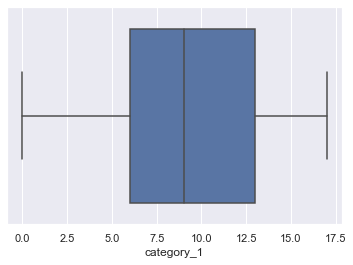

In [21]:
sns.boxplot(items.category_1)

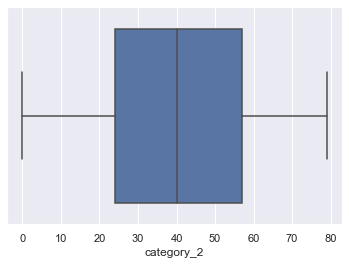

In [22]:
sns.boxplot(items.category_2)

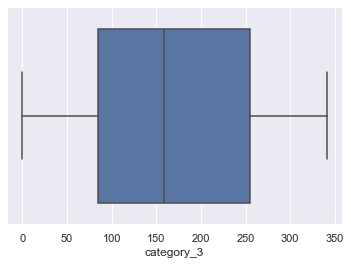

In [23]:
sns.boxplot(items.category_3)

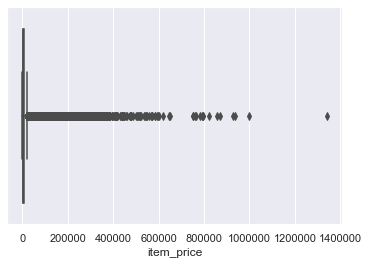

In [24]:
sns.boxplot(items.item_price)

In [25]:
print("minimum price",items.item_price.min())
print("maximum price",items.item_price.max())

minimum price 5
maximum price 1340800


1. The depth for all the three categories varies. These three features may need to be standardized. It will be trated as a numerical variable only
2. The prices for items start from as low as 5 and goes up till 1340800. most of the items belong to the lower priced brackets. 

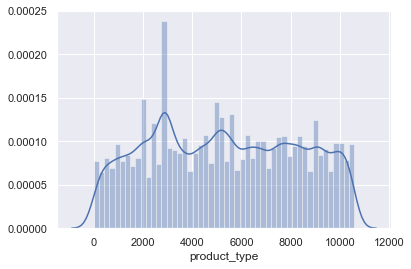

In [26]:
sns.distplot(items.product_type)

## 2. Performing joins

In [27]:
logs.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [28]:
items.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [29]:
logs_items = logs.join(items,on="item_id",how="left",lsuffix="",rsuffix="_l").drop(["item_id_l"],axis=1)
logs_items.head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-10-15 08:58:00,android,112333,4557,32970,6176.0,14.0,62.0,201.0,4077.0
1,2018-10-15 08:58:00,android,503590,74788,7640,128348.0,9.0,3.0,27.0,234.0
2,2018-10-15 08:58:00,android,573960,23628,128855,7616.0,1.0,28.0,336.0,6823.0
3,2018-10-15 08:58:00,android,121691,2430,12774,499.0,13.0,58.0,189.0,9839.0
4,2018-10-15 08:58:00,android,218564,19227,28296,633.0,11.0,51.0,329.0,3844.0


In [30]:
print(logs_items.shape)
missing(logs_items)

(3118622, 10)
Number of missing values in server_time:  0
Number of missing values in device_type:  0
Number of missing values in session_id:  0
Number of missing values in user_id:  0
Number of missing values in item_id:  0
Number of missing values in item_price:  4092
Number of missing values in category_1:  4092
Number of missing values in category_2:  4092
Number of missing values in category_3:  4092
Number of missing values in product_type:  4092


In [31]:
len(items.item_id.unique())-len(logs.item_id.unique())

6053

In [32]:
train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


This means there are 4092 item_ids in view_logs.csv that have no corresponding id in item_data.csv

## 3. Feature Engineering

### 3.1 Ideas for new features
1. User_id decile based on item prices (Will categorize users based on amount of money spent by the user)
2. User_id decile based on no_of_clicks (Will categorize users based on number of times he/she clicks on the ad )
3. Time spent on each item (items_log)

### 3.2 Encoding Schemes 
How to encode user_id, app_code

In [33]:
def encoder_os(x):
    if x == "old":
        return 0
    elif x == "intermediate":
        return 1
    return 2
train.os_version = train.os_version.apply(lambda x: encoder_os(x))
test.os_version = test.os_version.apply(lambda x: encoder_os(x))

In [34]:
# train = pd.concat([train,pd.get_dummies(train.is_4G)],axis=1)
# test = pd.concat([test,pd.get_dummies(test.is_4G)],axis=1)

### 3.3 Datetime Encoding

In [35]:
def get_time_feats(df,col):
    df[col] = pd.to_datetime(df[col],format='%Y-%m-%d %H:%M:%S') 
    df[col+"_year"] = df[col].apply(lambda x:x.year)
    df[col+"_month"] = df[col].apply(lambda x:x.month)
    df[col+"_day"] = df[col].apply(lambda x:x.day)
    df[col+"_hour"] = df[col].apply(lambda x:x.hour)
    df[col+"_dayofweek"] = df[col].apply(lambda x:x.dayofweek)
    return df

In [36]:
train = get_time_feats(train,"impression_time")
train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_year,impression_time_month,impression_time_day,impression_time_hour,impression_time_dayofweek
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,0,0,0,2018,11,15,0,3
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,2,1,1,2018,11,15,0,3
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,1,1,0,2018,11,15,0,3
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,2,1,0,2018,11,15,0,3
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,2,0,0,2018,11,15,0,3


In [37]:
test = get_time_feats(test,"impression_time")
test.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,impression_time_year,impression_time_month,impression_time_day,impression_time_hour,impression_time_dayofweek
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,2,1,2018,12,13,7,3
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,2,0,2018,12,13,7,3
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,2,1,2018,12,13,7,3
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,2,1,2018,12,13,7,3
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,2,1,2018,12,13,7,3


In [38]:
logs_items = get_time_feats(logs_items,"server_time")
logs_items.head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type,server_time_year,server_time_month,server_time_day,server_time_hour,server_time_dayofweek
0,2018-10-15 08:58:00,android,112333,4557,32970,6176.0,14.0,62.0,201.0,4077.0,2018,10,15,8,0
1,2018-10-15 08:58:00,android,503590,74788,7640,128348.0,9.0,3.0,27.0,234.0,2018,10,15,8,0
2,2018-10-15 08:58:00,android,573960,23628,128855,7616.0,1.0,28.0,336.0,6823.0,2018,10,15,8,0
3,2018-10-15 08:58:00,android,121691,2430,12774,499.0,13.0,58.0,189.0,9839.0,2018,10,15,8,0
4,2018-10-15 08:58:00,android,218564,19227,28296,633.0,11.0,51.0,329.0,3844.0,2018,10,15,8,0


#### 4. 

## 4. Modelling

In [39]:
import xgboost as xgb

In [40]:
X = train.drop(["impression_time","is_click","impression_id","impression_time_year"],axis=1)
X.head()

,user_id,app_code,os_version,is_4G,impression_time_month,impression_time_day,impression_time_hour,impression_time_dayofweek
0,87862,422,0,0,11,15,0,3
1,63410,467,2,1,11,15,0,3
2,71748,259,1,1,11,15,0,3
3,69209,244,2,1,11,15,0,3
4,62873,473,2,0,11,15,0,3


In [41]:
y= train.is_click
# test_id = test.impression_id
test_df = test.drop(["impression_time","impression_id","impression_time_year"],axis=1)
test_df.head()

,user_id,app_code,os_version,is_4G,impression_time_month,impression_time_day,impression_time_hour,impression_time_dayofweek
0,44754,127,2,1,12,13,7,3
1,29656,44,2,0,12,13,7,3
2,25234,296,2,1,12,13,7,3
3,22988,207,2,1,12,13,7,3
4,35431,242,2,1,12,13,7,3


In [42]:
dtrain = xgb.DMatrix(np.array(X), label=y)
dtest = xgb.DMatrix(np.array(test_df))
params = {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': -1, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.7 ,'eval_metric':'auc'}
num_round=1000
gbdt = xgb.train(params, dtrain,num_round)
pred = gbdt.predict(dtest)

C:\Users\am21907\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\am21907\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [43]:
ans = pd.DataFrame()
ans["impression_id"] = test.impression_id
ans["is_click"] = pred
ans.head()

,impression_id,is_click
0,a9e7126a585a69a32bc7414e9d0c0ada,0.061307
1,caac14a5bf2ba283db7708bb34855760,0.009798
2,13f10ba306a19ce7bec2f3cae507b698,0.073228
3,39c4b4dc0e9701b55a0a4f072008fb3f,0.011843
4,bf5a572cca75f5fc67f4b14e58b11d70,0.102496


In [44]:
ans.to_csv("../output/xgboost_with_datetime_but_nothing_else_yearDropped.csv",index=None)

In [45]:
logs.loc[logs.session_id==112333]

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
41,2018-10-15 08:59:00,android,112333,4557,132775
43,2018-10-15 08:59:00,android,112333,4557,100092
89,2018-10-15 09:01:00,android,112333,4557,115470
138,2018-10-15 09:03:00,android,112333,4557,35370


In [46]:
logs_items.loc[logs.session_id==1065742]

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type,server_time_year,server_time_month,server_time_day,server_time_hour,server_time_dayofweek
254633,2018-10-20 13:56:00,android,1065742,4557,109289,947.0,8.0,21.0,104.0,2944.0,2018,10,20,13,5
254682,2018-10-20 13:57:00,android,1065742,4557,2121,98560.0,4.0,38.0,19.0,2.0,2018,10,20,13,5
255095,2018-10-20 14:07:00,android,1065742,4557,116073,23827.0,8.0,40.0,84.0,5036.0,2018,10,20,14,5


In [47]:
train.loc[train.user_id==4557]

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_year,impression_time_month,impression_time_day,impression_time_hour,impression_time_dayofweek
63675,6dd9544216149618da55e183f73e2b56,2018-11-26 14:37:00,4557,213,2,1,0,2018,11,26,14,0
66024,6ba86f2d1de0989ffbf73cc37f5825c9,2018-11-26 14:35:00,4557,213,2,1,0,2018,11,26,14,0


In [48]:
logs.loc[logs.user_id==2]

,server_time,device_type,session_id,user_id,item_id
51634,2018-10-16 10:40:00,android,451378,2,127236
51692,2018-10-16 10:42:00,android,451378,2,127236
51737,2018-10-16 10:43:00,android,451378,2,61874
51808,2018-10-16 10:44:00,android,451378,2,31772
51812,2018-10-16 10:44:00,android,451378,2,12208
51890,2018-10-16 10:46:00,android,451378,2,42173
52187,2018-10-16 10:52:00,android,451378,2,33074
52249,2018-10-16 10:54:00,android,451378,2,89797
52314,2018-10-16 10:55:00,android,451378,2,48620
53825,2018-10-16 11:27:00,android,363560,2,113131


In [49]:
train.loc[train.user_id==2]

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_year,impression_time_month,impression_time_day,impression_time_hour,impression_time_dayofweek
24562,010ed37e44e2fdc175b4c5c6c930805a,2018-11-20 20:53:00,2,190,1,0,0,2018,11,20,20,1
49515,2b12c0d47f5821a5adb3bfd973d0f708,2018-11-19 20:49:00,2,190,1,0,0,2018,11,19,20,0
54202,f85e4bf0e34f3ee66add56229845e4db,2018-11-20 20:29:00,2,190,1,0,0,2018,11,20,20,1
78666,577c63f9937fa0e8d4650ddf1510a03f,2018-11-21 21:47:00,2,190,1,0,0,2018,11,21,21,2
